# Sentiment Analysis

## Import libraries


In [20]:
! pip install -qq datasets

In [21]:
from datasets import load_dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from tensorflow.keras.models import Sequential


## Load data

In [22]:
dataset = load_dataset("scaredmeow/shopee-reviews-tl-binary")

  0%|          | 0/3 [00:00<?, ?it/s]

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 28000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 6000
    })
})

### Convert to dataframe

In [24]:
#TODO:Convert train data to dataframe
df_train = pd.DataFrame(dataset['train'])
df_train.head()

,text,label
0,"okay siya working naman sa phone and iPad ko, ...",1
1,"Ang cute nya, at ang lakas NG sound thanks din...",1
2,subra disapoint ako sayu seller 6na XXL order ...,0
3,Maganda ang hitsura katulad ng nasa picture ka...,0
4,Maganda naman quality nya despite it's price. ...,1


In [25]:
#TODO:Convert validation data to dataframe
df_val = pd.DataFrame(dataset['validation'])
df_val.head()

,text,label
0,Sobrang Ganda nya sa personal ung kulay nya sa...,1
1,"My review is on the pictures, please read! OVE...",1
2,Maganda po yung pants. Medyo makapal sya. Both...,1
3,Mali lahat ng dumating buti nalang mura pwede ...,0
4,"Ordered at 8.22, shipped at 8.24, received tod...",0


In [26]:
#TODO:Convert tset data to dataframe
df_test = pd.DataFrame(dataset['test'])
df_test.head()

,text,label
0,Ok naman nung ng I test ko.pero bakit Ganon Hi...,0
1,Wala pong hawakan ung tumbler kung pwede po pa...,0
2,Black inorder ko brown dumating tas di sya kap...,0
3,basag ung ung takip ng 2L sa may pindutan. mal...,0
4,Thanks kahit matagal dumating. Ok nman xia. Ma...,1


### Bar plot of the number of labrls

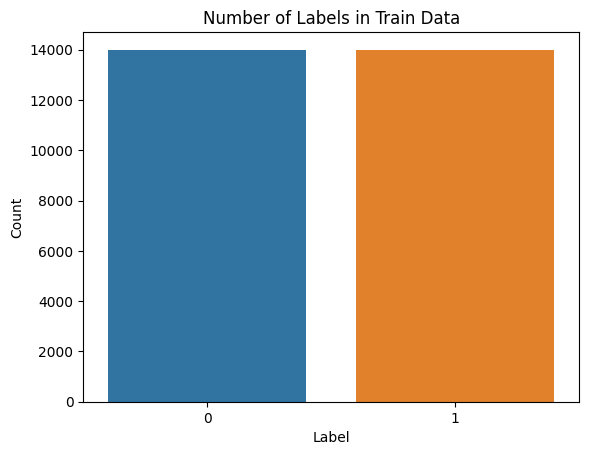

In [27]:
#TODO: Bar plot of the number of labels for train data
label_counts = df_train['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Labels in Train Data')
plt.show()

### Split to X, y

In [28]:
#TODO: split data(train, val, test) to X(input), y(output)

X_train = df_train['text'].values
y_train = df_train['label'].values

X_val = df_val['text'].values
y_val = df_val['label'].values

X_test = df_test['text'].values
y_test = df_test['label'].values

## Tokenization

In [29]:
#TODO: Tokenize and padding X_train
max_words = 10000
max_len = 100
# Tokenize and pad X_train
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=max_len, padding='post')

In [30]:
# Tokenize and pad X_val
sequences_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(sequences_val, maxlen=max_len, padding='post')

In [31]:
# Tokenize and pad X_test
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen=max_len, padding='post')

## Simple RNN

### Create model and Train

In [32]:
# TODO: create simple rnn model and train on train data
# Create the RNN model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
438/438 [==============================] - 90s 201ms/step - loss: 0.3789 - accuracy: 0.8474 - val_loss: 0.2846 - val_accuracy: 0.8997
Epoch 2/10
438/438 [==============================] - 55s 127ms/step - loss: 0.2617 - accuracy: 0.9115 - val_loss: 0.2636 - val_accuracy: 0.9103
Epoch 3/10
438/438 [==============================] - 53s 120ms/step - loss: 0.2622 - accuracy: 0.9061 - val_loss: 0.5279 - val_accuracy: 0.7557
Epoch 4/10
438/438 [==============================] - 51s 117ms/step - loss: 0.3950 - accuracy: 0.8478 - val_loss: 0.3746 - val_accuracy: 0.8587
Epoch 5/10
438/438 [==============================] - 51s 116ms/step - loss: 0.3254 - accuracy: 0.8838 - val_loss: 0.3718 - val_accuracy: 0.8630
Epoch 6/10
438/438 [==============================] - 50s 113ms/step - loss: 0.2820 - accuracy: 0.8987 - val_loss: 0.3515 - val_accuracy: 0.8563
Epoch 7/10
438/438 [==============================] - 49s 111ms/step - loss: 0.2776 - accuracy: 0.9015 - val_loss: 0.3925 - val_ac

#### plot over training time

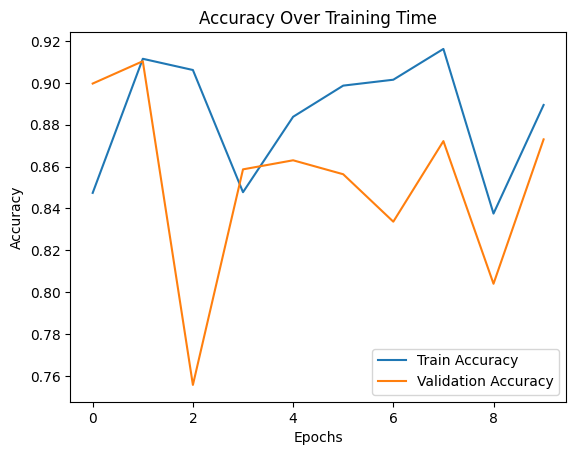

In [33]:
# TODO: plot accuracy over training time for train data and validation data
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Time')
plt.legend()
plt.show()

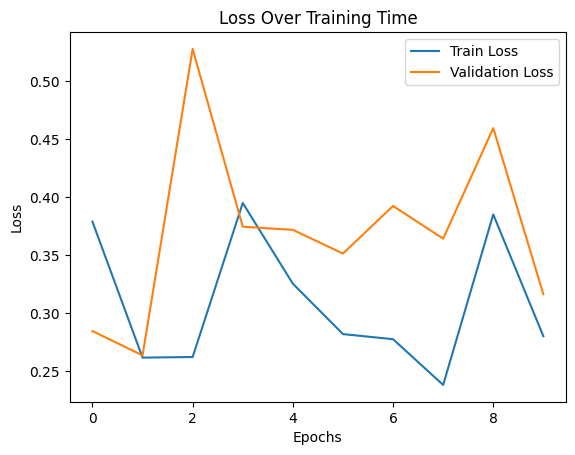

In [34]:
# TODO: plot loss over training time for train data and validation data
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Training Time')
plt.legend()
plt.show()

### Test

In [35]:
# TODO: Calculate accuracyو precision, recall, f1-score for the test data
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)

report = classification_report(y_test, y_pred)
print(report)


188/188 [==============================] - 3s 14ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3000
           1       0.00      0.00      0.00      3000

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.33      6000
weighted avg       0.25      0.50      0.33      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


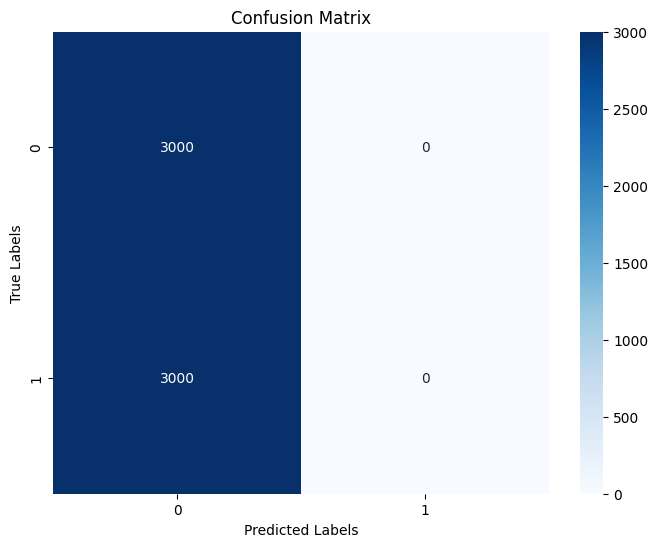

In [36]:
# TODO: Compute Confusion Matrix for test data
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## GRU

### Create model and Train

In [37]:
# TODO: create simple gru model and train on train data
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
438/438 [==============================] - 30s 65ms/step - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/10
438/438 [==============================] - 9s 20ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/10
438/438 [==============================] - 4s 9ms/step - loss: 0.6929 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5018
Epoch 4/10
438/438 [==============================] - 6s 14ms/step - loss: 0.6924 - accuracy: 0.5021 - val_loss: 0.6926 - val_accuracy: 0.5015
Epoch 5/10
438/438 [==============================] - 5s 12ms/step - loss: 0.7147 - accuracy: 0.4945 - val_loss: 0.6943 - val_accuracy: 0.5003
Epoch 6/10
438/438 [==============================] - 4s 9ms/step - loss: 0.6945 - accuracy: 0.4988 - val_loss: 0.6940 - val_accuracy: 0.5030
Epoch 7/10
438/438 [==============================] - 5s 11ms/step - loss: 0.6940 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4943


#### plot over training time

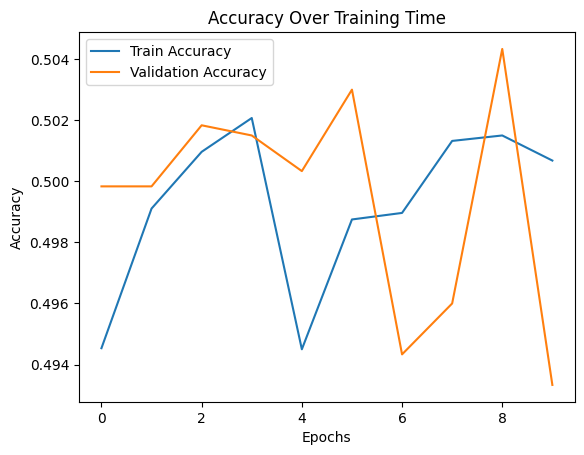

In [38]:
# TODO: plot accuracy over training time for train data and validation data
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Time')
plt.legend()
plt.show()


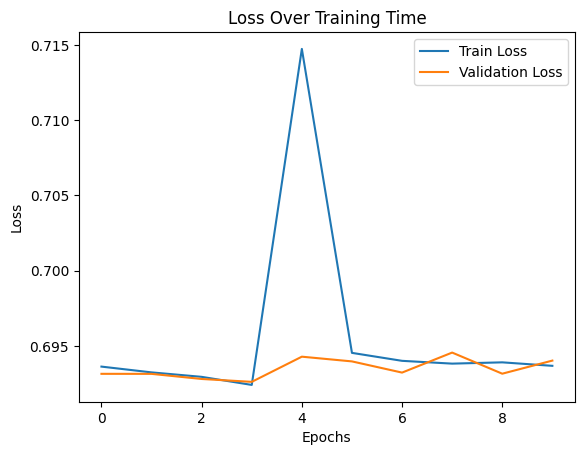

In [39]:
# TODO: plot loss over training time for train data and validation data
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Training Time')
plt.legend()
plt.show()


### Test

In [40]:
# TODO: Calculate accuracyو precision, recall, f1-score for the test data
predict_x=model.predict(X_test)
y_pred =np.argmax(predict_x,axis=1)

report = classification_report(y_test, y_pred)
print(report)


188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3000
           1       0.00      0.00      0.00      3000

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.33      6000
weighted avg       0.25      0.50      0.33      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


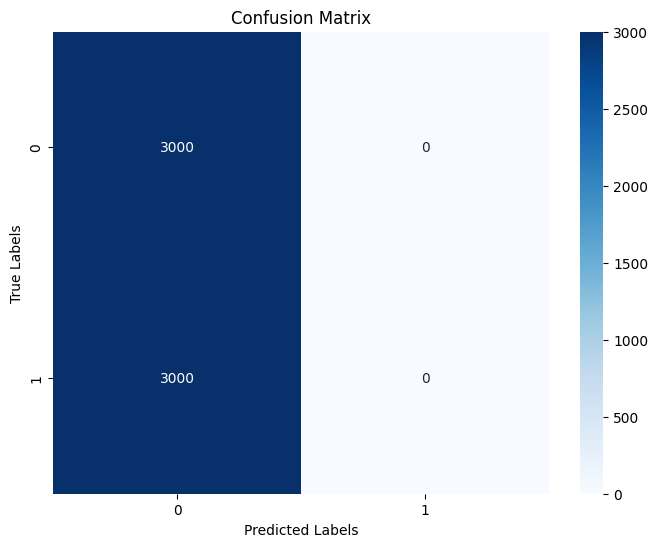

In [41]:
# TODO: Compute Confusion Matrix for test data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## LSTM

### Create model and Train

In [42]:
# TODO: create simple lstm model and train on train data
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
438/438 [==============================] - 31s 65ms/step - loss: 0.6935 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
438/438 [==============================] - 10s 23ms/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/10
438/438 [==============================] - 5s 12ms/step - loss: 0.6934 - accuracy: 0.5008 - val_loss: 0.6935 - val_accuracy: 0.5017
Epoch 4/10
438/438 [==============================] - 6s 13ms/step - loss: 0.6930 - accuracy: 0.4996 - val_loss: 0.6929 - val_accuracy: 0.4997
Epoch 5/10
438/438 [==============================] - 5s 11ms/step - loss: 0.6927 - accuracy: 0.4958 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 6/10
438/438 [==============================] - 4s 10ms/step - loss: 0.6960 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.4997
Epoch 7/10
438/438 [==============================] - 5s 12ms/step - loss: 0.6939 - accuracy: 0.4992 - val_loss: 0.6938 - val_accuracy: 0.50

#### plot over training time

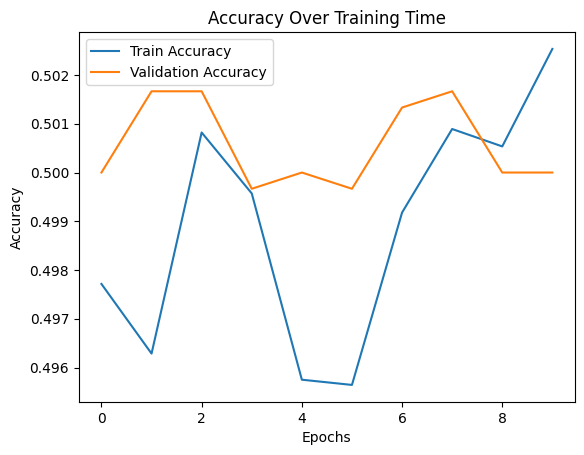

In [43]:
# TODO: plot accuracy over training time for train data and validation data
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Time')
plt.legend()
plt.show()

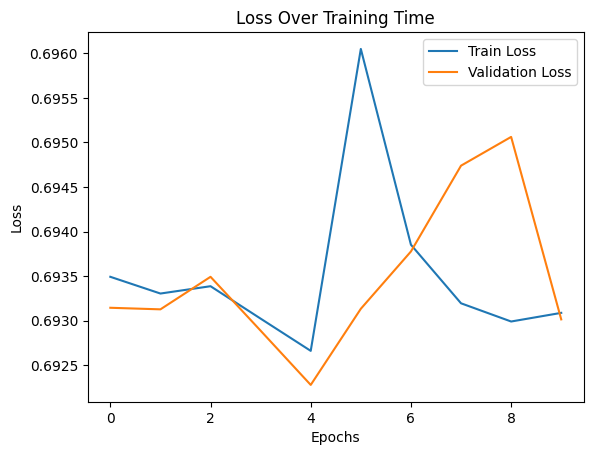

In [44]:
# TODO: plot loss over training time for train data and validation data
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Training Time')
plt.legend()
plt.show()

### Test

In [45]:
# TODO: Calculate accuracyو precision, recall, f1-score for the test data
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)

report = classification_report(y_test, y_pred)
print(report)


188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3000
           1       0.00      0.00      0.00      3000

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.33      6000
weighted avg       0.25      0.50      0.33      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


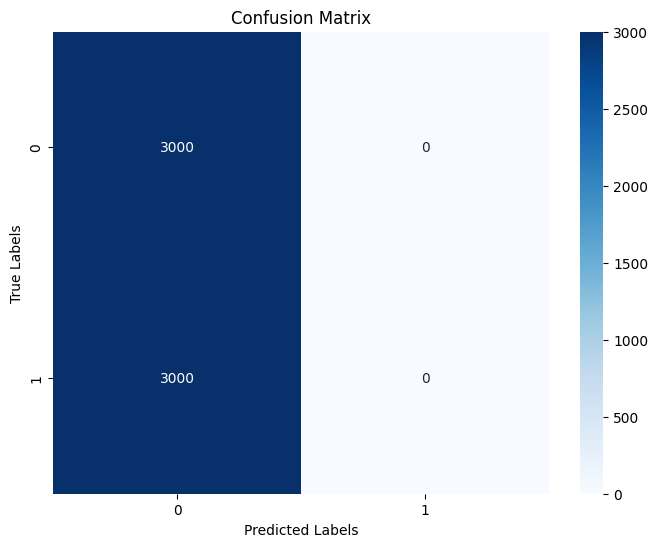

In [46]:
# TODO: Compute Confusion Matrix for test data'
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
